# Business insights on car brands through text mining

## Text Cleaning

In [3]:
# import modules
import pandas as pd
import numpy as np
import collections
import re
import nltk
#nltk.download('punkt')
import spacy
import string

In [4]:
# read data
manufacturer = pd.read_csv("./manufacturer.csv")
discussions_forum = pd.read_csv("./discussions_forum.csv")

In [5]:
# check data
print(manufacturer.head())
print(discussions_forum.head())

  name_of_manufacturers
0                  SNVI
1               Zanella
2                Koller
3            Anasagasti
4            AutoLatina
      user_names                   dates  \
0       cybersol  March 23, 2002 11:04AM   
1          merc1   March 24, 2002 9:54PM   
2         fredvh  March 24, 2002 11:06PM   
3  blueguydotcom   March 25, 2002 9:02AM   
4    hungrywhale   March 25, 2002 3:04PM   

                                            comments  
0  Entry level performance luxury sedans are a ho...  
1  I personally think that with a few tweaks the ...  
2  I am debating a new purchase and these two are...  
3  Great handling, RWD, excellent engine and the ...  
4  And no manual tranny. That may not matter to y...  


In [6]:
# create a dataframe from the comments column of discussions_forum
df = pd.DataFrame(discussions_forum['comments'])

# check data
print(df.head())

                                            comments
0  Entry level performance luxury sedans are a ho...
1  I personally think that with a few tweaks the ...
2  I am debating a new purchase and these two are...
3  Great handling, RWD, excellent engine and the ...
4  And no manual tranny. That may not matter to y...


In [7]:
# print first row of comments column
print(df['comments'][0])

Entry level performance luxury sedans are a hot area for car manufacturers and enthusiasts alike. These sedans show their performance by being fun to drive and handling well. They show luxury by offering leather and some of the important creatures comforts found in the most luxurious upscale sedans. The selection of vehicles that compete in the space is vast and varied.The benchmarks which define this are the BMW 330 and the Audi A4 3.0. But there are many contenders, such as Acura TL-S, Chrysler 300M, Jaguar X-type, Infiniti I35, Mercedes C-Class, Volvo S60 T5. Some companies have contenders that emphasize performance Lexus IS300 or luxury Lexus ES300. And the field is continously growing, with the recent additions being the Cadillac CTS and Infiniti G35.The common charateristics of this entry level perfomance luxury group seem to a price around 30 to 40k (US dollars) and 0-60 times between six and eight seconds.With this wide variety of cars targeted at a similar market segment, the 

In [8]:
# check missing values
print(df.isnull().sum())

# drop missing values
df.dropna(inplace=True)

comments    24
dtype: int64


In [9]:
# check duplicates
print(df.duplicated().sum())

# drop duplicates
df.drop_duplicates(inplace=True)

12


In [10]:
from nltk import word_tokenize

# tokenize comments column until the last row
df['comments'] = df['comments'].apply(lambda x: word_tokenize(x))

# check data
print(df.head())

                                            comments
0  [Entry, level, performance, luxury, sedans, ar...
1  [I, personally, think, that, with, a, few, twe...
2  [I, am, debating, a, new, purchase, and, these...
3  [Great, handling, ,, RWD, ,, excellent, engine...
4  [And, no, manual, tranny, ., That, may, not, m...


In [11]:
# lowercase all words
df['comments'] = df['comments'].apply(lambda x: [word.lower() for word in x])

# check data
print(df.head())

                                            comments
0  [entry, level, performance, luxury, sedans, ar...
1  [i, personally, think, that, with, a, few, twe...
2  [i, am, debating, a, new, purchase, and, these...
3  [great, handling, ,, rwd, ,, excellent, engine...
4  [and, no, manual, tranny, ., that, may, not, m...


In [12]:
# remove punctuation
df['comments'] = df['comments'].apply(lambda x: [word for word in x if word not in string.punctuation])

# check data
print(df.head())

                                            comments
0  [entry, level, performance, luxury, sedans, ar...
1  [i, personally, think, that, with, a, few, twe...
2  [i, am, debating, a, new, purchase, and, these...
3  [great, handling, rwd, excellent, engine, and,...
4  [and, no, manual, tranny, that, may, not, matt...


In [13]:
# remove stopwords
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df['comments'] = df['comments'].apply(lambda x: [word for word in x if word not in stop_words])

# check data
print(df.head())

                                            comments
0  [entry, level, performance, luxury, sedans, ho...
1  [personally, think, tweaks, c320, could, also,...
2  [debating, new, purchase, two, top, list, pric...
3  [great, handling, rwd, excellent, engine, best...
4  [manual, tranny, may, matter, certainly, matte...


In [14]:
# remove duplicates or words that appear more than once in a comment
df['comments'] = df['comments'].apply(lambda x: list(set(x)))

# check data
print(df.head())

                                            comments
0  [benchmarks, performance, emphasize, wide, see...
1  [square, much, sit, performance, coupe, wood, ...
2  [service, list, better, much, new, familiar, n...
3  [handling, around, best, winner, excellent, rw...
4  [many, let, certainly, 'easy, winner, imo, boa...


In [15]:
# remove rare words
from collections import Counter
counts = Counter()
for index, row in df.iterrows():
    counts.update(row['comments'])
df['comments'] = df['comments'].apply(lambda x: [word for word in x if counts[word] > 1])

# check data
print(df.head())

                                            comments
0  [benchmarks, performance, emphasize, wide, see...
1  [square, much, sit, performance, coupe, wood, ...
2  [service, list, better, much, new, familiar, n...
3  [handling, around, best, winner, excellent, rw...
4  [many, let, certainly, winner, imo, board, may...


In [16]:
# create a dataframe from the name_of_manufacturers column of manufacturer
df1 = pd.DataFrame(manufacturer['name_of_manufacturers'])

# check data
print(df1.head())

  name_of_manufacturers
0                  SNVI
1               Zanella
2                Koller
3            Anasagasti
4            AutoLatina


In [17]:
# check missing values and duplicates
print(df1.isnull().sum())
print(df1.duplicated().sum())

# drop missing values and duplicates
df1.drop_duplicates(inplace=True)

name_of_manufacturers    0
dtype: int64
19


In [18]:
# lowercase all words
df1['name_of_manufacturers'] = df1['name_of_manufacturers'].apply(lambda x: x.lower())

# check data
print(df1.head())

  name_of_manufacturers
0                  snvi
1               zanella
2                koller
3            anasagasti
4            autolatina


In [19]:
# remove punctuation
df1['name_of_manufacturers'] = df1['name_of_manufacturers'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# check data
print(df1.head())

  name_of_manufacturers
0                  snvi
1               zanella
2                koller
3            anasagasti
4            autolatina


In [20]:
# print it as set
print(set(df1['name_of_manufacturers']))

{'haynes', 'asia motors', 'mitsubishi fuso', 'cole', 'rambler', 'nova bus', 'brennabor', 'toyota', 'bohdan', 'bentley', 'national', 'pirinfiat', 'callaway', 'lamborghini', 'allard', 'locomobile', 'think  ', 'santa matilde', 'englon', 'fordvairogs', 'fap', 'wanderer', 'isuzu', 'effa', 'triumph', 'roman', 'dfm', 'inokom', 'polski fiat', 'soletta', 'borland racing developments', 'belgee', 'orca engineering ', 'lanchester', 'keohwa', 'jeep', 'hommell', 'fsm', 'aws', 'seaz', 'méga', 'interstate', 'dennis', 'dynasty', 'meteor', 'iava', 'pacific trucks', 'pancar', 'duesenberg', 'matra', 'scg', 'setra', 'avia', 'lotec', 'smz', 'doking', 'volvo cars', 'adams brothers', 'comil', 'genesis', 'leblanc', 'chandler', 'scion', 'delahaye', 'mosler', 'simplex', 'glas', 'proterra', 'fuso', 'sterling trucks', 'farus', 'vencer', 'gm uzbekistan', 'inkas', 'valmet automotive', 'jinbei', 'mclaren', 'acura', 'freightliner', 'zotye', 'imperial', 'datsun', 'lasalle', 'guleryuz', 'changan', 'trekka', 'theologou',

## Text Encoding

### Use the list of manufacturers to help you find the top 5 brands from the forum messages by calculating frequency counts; if the same post mentions two or more brands then each of those brands should get their frequency count increased.

In [21]:
# create a list of manufacturers
manufacturer_list = df1['name_of_manufacturers'].tolist()

# check data
#print(manufacturer_list)

# create a list of brands
brands = []
for index, row in df.iterrows():
    for word in row['comments']:
        if word in manufacturer_list:
            brands.append(word)

# check data
#print(brands)

# create a dictionary of brands
brand_dict = {}
for brand in brands:
    if brand in brand_dict:
        brand_dict[brand] += 1
    else:
        brand_dict[brand] = 1

# check data
#print(brand_dict)

# sort the dictionary by value
sorted_brand_dict = sorted(brand_dict.items(), key=lambda x: x[1], reverse=True)

# check data
#print(sorted_brand_dict)

# create a dataframe from the sorted dictionary
df_brand = pd.DataFrame(sorted_brand_dict, columns=['brand', 'count'])

# check data
#print(df_brand.head())

# create a list of top 5 brands
top_5_brands = df_brand['brand'].tolist()[:5]

# check data
print(top_5_brands)

['bmw', 'honda', 'acura', 'lexus', 'toyota']


### Calculate the frequency of co-mentions of brands. For example, if Honda and Toyota are mentioned in the same post then the co-mention frequency of Honda and Toyota increases by 1. Which are the top 3 brand pairs which get mentioned together the most?

In [22]:
# create a list of brand pairs
brand_pairs = []
for index, row in df.iterrows():
    for i in range(len(row['comments'])):
        for j in range(i+1, len(row['comments'])):
            if row['comments'][i] in top_5_brands and row['comments'][j] in top_5_brands:
                brand_pairs.append((row['comments'][i], row['comments'][j]))

# check data
#print(brand_pairs)

# create a dictionary of brand pairs
brand_pairs_dict = {}
for brand_pair in brand_pairs:
    if brand_pair in brand_pairs_dict:
        brand_pairs_dict[brand_pair] += 1
    else:
        brand_pairs_dict[brand_pair] = 1

# check data
#print(brand_pairs_dict)

# sort the dictionary by value
sorted_brand_pairs_dict = sorted(brand_pairs_dict.items(), key=lambda x: x[1], reverse=True)

# check data
#print(sorted_brand_pairs_dict)

# create a dataframe from the sorted dictionary
df_brand_pairs = pd.DataFrame(sorted_brand_pairs_dict, columns=['brand_pair', 'count'])

# check data
#print(df_brand_pairs.head())

# create a list of top 3 brand pairs
top_3_brand_pairs = df_brand_pairs['brand_pair'].tolist()[:3]

# check data
print(top_3_brand_pairs)

[('bmw', 'lexus'), ('toyota', 'honda'), ('bmw', 'acura')]


### Find the most frequent attributes of the top 5 brands. For example, if the top 5 brands are Honda, Toyota, Ford, Nissan and BMW, then the most frequent attributes of these brands are the words that appear in the same post as these brands. Which are the top 5 attributes of the top 5 brands?

In [35]:
# create a list of attributes
attributes = []
for index, row in df.iterrows():
    for word in row['comments']:
        if word not in top_5_brands:
            attributes.append(word)

# check data
#print(attributes)

# create a dictionary of attributes
attribute_dict = {}
for attribute in attributes:
    if attribute in attribute_dict:
        attribute_dict[attribute] += 1
    else:
        attribute_dict[attribute] = 1

# check data
#print(attribute_dict)

# sort the dictionary by value
sorted_attribute_dict = sorted(attribute_dict.items(), key=lambda x: x[1], reverse=True)

# check data
#print(sorted_attribute_dict)

# remove words that appear less than 200 times
sorted_attribute_dict = [x for x in sorted_attribute_dict if x[1] > 200]

# check data
print(sorted_attribute_dict)

[('car', 3813), ("n't", 3609), ("'s", 3492), ('like', 2452), ('would', 2373), ('cars', 2183), ('get', 2170), ('one', 2163), ('``', 2139), ("''", 1908), ('...', 1830), ('new', 1708), ('think', 1684), ('good', 1656), ('much', 1498), ("'m", 1449), ('drive', 1429), ('better', 1395), ('also', 1365), ('really', 1230), ('well', 1223), ('want', 1217), ('even', 1209), ('know', 1204), ('tl', 1093), ('price', 1082), ("'ve", 1051), ('could', 1036), ('3', 1019), ('go', 1007), ('years', 1000), ('buy', 996), ('driving', 978), ("'d", 966), ('time', 959), ('best', 956), ('still', 953), ('looking', 940), ('people', 923), ('great', 899), ('used', 897), ("'ll", 882), ('make', 875), ('see', 870), ('sedan', 866), ('g35', 866), ('way', 861), ('going', 850), ('need', 827), ('say', 815), ('look', 814), ('performance', 804), ('miles', 791), ('year', 776), ('less', 772), ("'re", 771), ('engine', 769), ('lot', 767), ('back', 741), ('accord', 727), ('right', 719), ('sure', 719), ('said', 715), ('many', 714), ('aro

#### We can select top attributes from above: ['reliability', 'reliable', 'luxury', 'pretty', 'fun', 'expensive']

In [36]:
# create a list of top 6 attributes containing reliability, reliable, luxury, pretty, fun, expensive and check if this list is associated with the top 5 brands
top_6_attributes = ['reliability', 'reliable', 'luxury', 'pretty', 'fun', 'expensive']
top_5_brands.append(top_6_attributes)

# check data
print(top_5_brands)

# create a list of brand attributes
brand_attributes = []
for index, row in df.iterrows():
    for i in range(len(row['comments'])):
        if row['comments'][i] in top_5_brands:
            for j in range(len(row['comments'])):
                if row['comments'][j] in top_6_attributes:
                    brand_attributes.append((row['comments'][i], row['comments'][j]))

# check data
#print(brand_attributes)

# create a dictionary of brand attributes
brand_attributes_dict = {}
for brand_attribute in brand_attributes:
    if brand_attribute in brand_attributes_dict:
        brand_attributes_dict[brand_attribute] += 1
    else:
        brand_attributes_dict[brand_attribute] = 1

# check data
#print(brand_attributes_dict)

# sort the dictionary by value
sorted_brand_attributes_dict = sorted(brand_attributes_dict.items(), key=lambda x: x[1], reverse=True)

# check data
#print(sorted_brand_attributes_dict)

# create a dataframe from the sorted dictionary
df_brand_attributes = pd.DataFrame(sorted_brand_attributes_dict, columns=['brand_attribute', 'count'])

# check data
print(df_brand_attributes)

['bmw', 'honda', 'acura', 'lexus', 'toyota', ['reliability', 'reliable', 'luxury', 'pretty', 'fun', 'expensive'], ['reliability', 'reliable', 'luxury', 'pretty', 'fun', 'expensive']]
          brand_attribute  count
0   (bmw, luxury)          164  
1   (bmw, fun)             123  
2   (bmw, reliability)     120  
3   (honda, reliability)   108  
4   (acura, luxury)        101  
5   (lexus, luxury)        96   
6   (bmw, pretty)          92   
7   (toyota, reliability)  90   
8   (honda, reliable)      85   
9   (toyota, reliable)     81   
10  (bmw, expensive)       76   
11  (lexus, reliability)   69   
12  (bmw, reliable)        64   
13  (honda, fun)           63   
14  (honda, pretty)        59   
15  (acura, reliability)   56   
16  (honda, luxury)        56   
17  (acura, pretty)        53   
18  (acura, fun)           51   
19  (lexus, fun)           51   
20  (toyota, fun)          50   
21  (toyota, luxury)       45   
22  (toyota, pretty)       45   
23  (lexus, pretty)      

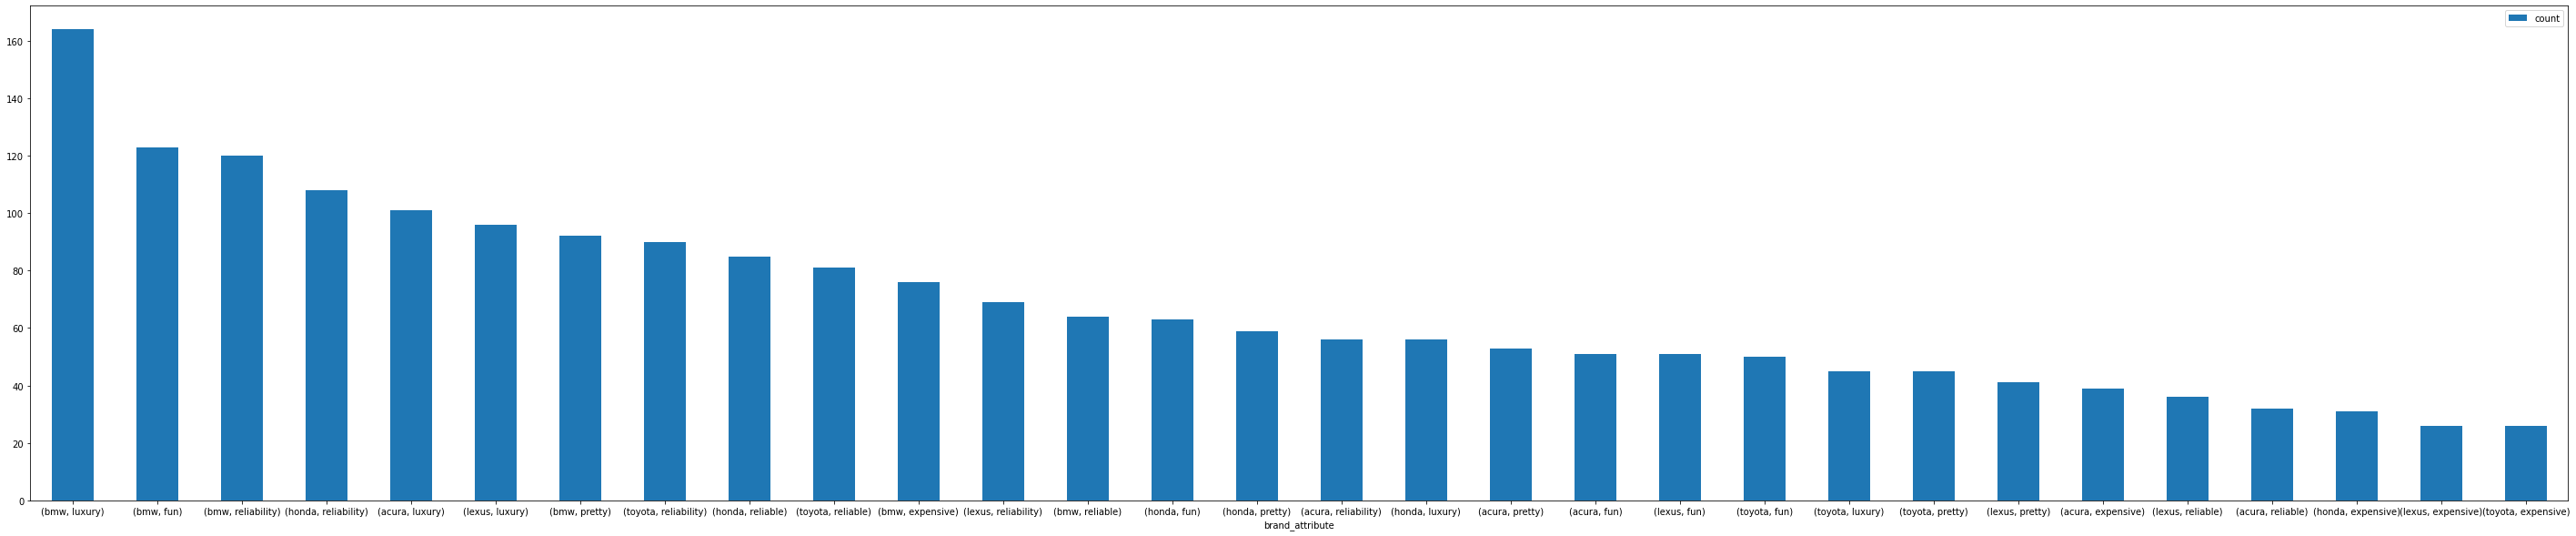

In [25]:
# import matplotlib
import matplotlib.pyplot as plt

# visualize df_brand_attributes
df_brand_attributes.plot.bar(x='brand_attribute', y='count', rot=0, figsize=(50, 10))
plt.show()


### Which is the most aspirational brand in your data in terms of people actually wanting to buy or own?

BMW is the most aspirational brand in my data, as it is highly associated with the top 3 attributes that people desire when considering a purchase or ownership. These attributes are all ranked highly in association with the BMW brand.

### A note of insights:

Based on the analysis, it can be assumed that BMW, Acura, and Lexus may target a similar audience as they are the top three brand pairs that are mentioned together the most (BMW and Acura, Toyota and Honda, and Lexus and Acura). Additionally, Toyota and Honda appear to be on a similar level of comparison. Furthermore, the top six attributes (reliability, reliable, luxury, pretty, fun, and expensive) suggests that these are considered important for people looking to buy a car. Therefore, any car manufacturer would likely see better sales if they can match some of these attributes to their vehicles or advertise them in association with the cars.